In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses
import pandas as pd
import numpy as np
import cv2 as cv

import random

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Importing data

In [3]:
train = pd.read_csv('drive/MyDrive/Sign_Language/sign_mnist_train.csv')
test = pd.read_csv('drive/MyDrive/Sign_Language/sign_mnist_test.csv')

Converting to Arrays

In [4]:
train_set = np.array(train, dtype = 'float32')
test_set = np.array(test, dtype='float32')

In [5]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

Thresholding function

In [6]:
def thresholding_2(image):
  threshold_ranges = [0,150,170,200,255]
  images = [image.reshape((28,28))]
  for i in range(len(threshold_ranges)-1):
      ret,thresh = cv.threshold(image,threshold_ranges[i],threshold_ranges[i+1],cv.THRESH_BINARY)
      images.append(thresh.reshape((28,28)))
    
  return images

Creating lists of all thresholded images

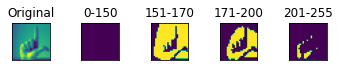

In [7]:
train_images = []
test_images = []

for a in range(train_set.shape[0]):
    train_images.append(thresholding_2(train_set[a,1:]))

for a in range(test_set.shape[0]):
    test_images.append(thresholding_2(test_set[a,1:]))

titles = ['Original','0-150', '151-170','171-200','201-255']

for i in range(len(titles)):
    plt.subplot(len(titles),len(titles),i+1),plt.imshow(train_images[123][i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

Spliting list of images to sub lists, containing one threshold per list

In [8]:
X_train_sets, X_test_sets = [], []

n = len(titles) - 1

for x in range(n):
  thresh = []
  for i in range(train_set.shape[0]):
    thresh.append(train_images[i][x+1])
  X_train_sets.append(thresh)

for x in range(n):
    thresh = []
    for i in range(test_set.shape[0]):
      thresh.append(test_images[i][x+1])
    X_test_sets.append(thresh)



X_train_sets = np.asarray(X_train_sets)
X_test_sets = np.asarray(X_test_sets)

y_train = train_set[:, 0]
y_test = test_set[:,0]

Here we need to merge thresholds into one image. We merge it into X* channel image, each channel containing one threshold.
*X - number of thresholds existing

In [10]:
X_train, X_test = [], []

for x in range(X_train_sets.shape[1]):
  q = []
  for i in range(28):
    w = []
    for j in range(28):
      l = []
      for v in range(len(titles) - 1):
        l.append(X_train_sets[v][x][i][j])
      w.append(l)
    q.append(w)
  X_train.append(q)

for x in range(X_test_sets.shape[1]):
  q = []
  for i in range(28):
    w = []
    for j in range(28):
      l = []
      for v in range(len(titles) - 1):
        l.append(X_test_sets[v][x][i][j])
      w.append(l)
    q.append(w)
  X_test.append(q)

In [11]:
X_test = np.asarray(X_test)
X_train = np.asarray(X_train)

In [12]:
print(X_test.shape)
print(X_train.shape)

(7172, 28, 28, 4)
(27455, 28, 28, 4)


Normalizing

In [13]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

LeNet-5 ish CNN Model

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, (len(titles) - 1))))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(filters=48, kernel_size=(5,5), padding='valid'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128, (3, 3)))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(25, activation='softmax'))

In [15]:
model.compile(optimizer='sgd', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [16]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    validation_data=(X_test, y_test),
                    batch_size=64)

Epoch 1/50
429/429 [==============================] - 34s 5ms/step - loss: 3.1945 - accuracy: 0.0476 - val_loss: 3.1934 - val_accuracy: 0.0374
Epoch 2/50
429/429 [==============================] - 2s 5ms/step - loss: 3.0819 - accuracy: 0.0869 - val_loss: 2.9402 - val_accuracy: 0.1299
Epoch 3/50
429/429 [==============================] - 2s 5ms/step - loss: 2.5124 - accuracy: 0.2293 - val_loss: 2.1095 - val_accuracy: 0.3680
Epoch 4/50
429/429 [==============================] - 2s 5ms/step - loss: 1.8880 - accuracy: 0.3870 - val_loss: 1.6178 - val_accuracy: 0.4955
Epoch 5/50
429/429 [==============================] - 2s 5ms/step - loss: 1.5427 - accuracy: 0.4879 - val_loss: 1.3275 - val_accuracy: 0.5792
Epoch 6/50
429/429 [==============================] - 2s 5ms/step - loss: 1.2961 - accuracy: 0.5651 - val_loss: 1.1245 - val_accuracy: 0.6195
Epoch 7/50
429/429 [==============================] - 2s 5ms/step - loss: 1.1069 - accuracy: 0.6253 - val_loss: 0.9421 - val_accuracy: 0.6874
Epoch

Plotting loss and accuracy

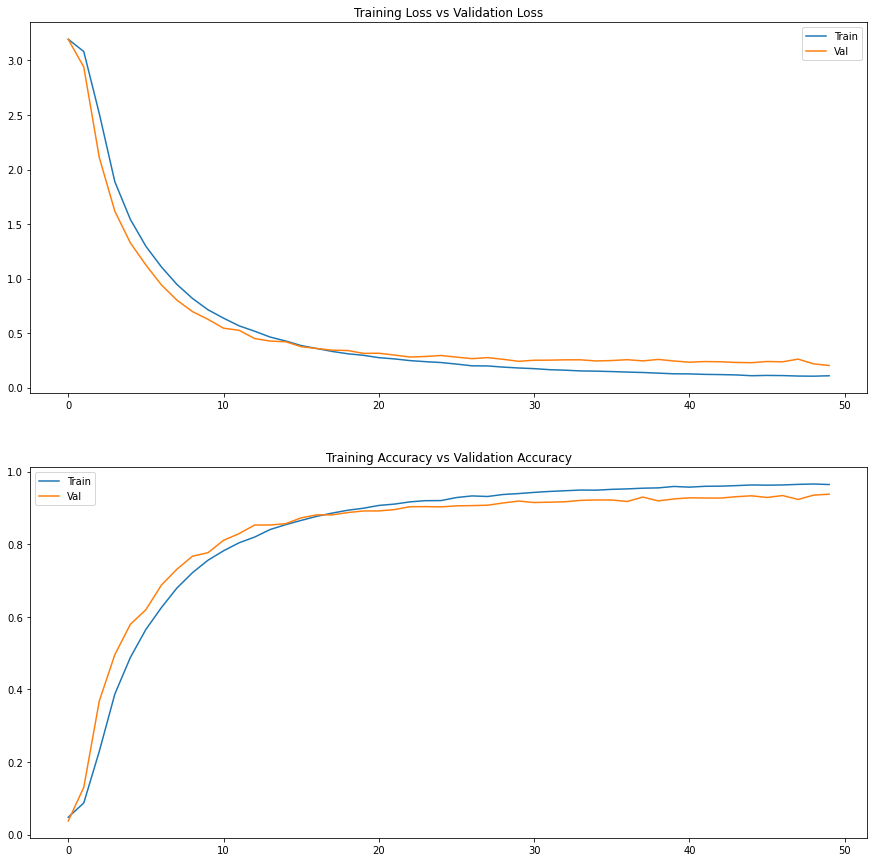

In [17]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])
